## Observations and Insights 

In [207]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [208]:
# Checking the number of mice in the DataFrame.
combined_mouse_data["Mouse ID"].count()

1893

In [209]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#dup_mouse_data = combined_mouse_data[combined_mouse_data.duplicated()]
dup_mouse_data = combined_mouse_data[combined_mouse_data.duplicated(["Mouse ID", "Timepoint"])]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [210]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989_data = combined_mouse_data[combined_mouse_data["Mouse ID"] == "g989"]
mouse_g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [211]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
delete_mouse = combined_mouse_data[combined_mouse_data["Mouse ID"]=="g989"].index
combined_mouse_data.drop(delete_mouse, inplace=True)

clean_mouse_data = combined_mouse_data
clean_mouse_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [212]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data["Mouse ID"].count()
clean_mouse_data.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [222]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped = clean_mouse_data.groupby(["Drug Regimen"])

tumor_volumns_mean = regimen_grouped["Tumor Volume (mm3)"].mean()
tumor_volumns_median = regimen_grouped["Tumor Volume (mm3)"].median()
tumor_volumns_var = regimen_grouped["Tumor Volume (mm3)"].var()
tumor_volumns_std = regimen_grouped["Tumor Volume (mm3)"].std()
tumor_volumns_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

print(f"the mean is {tumor_volumns_mean}")
print(f" the median is {tumor_volumns_median}")
print(f"the variance is {tumor_volumns_var}")
print(f"the standard deviation is {tumor_volumns_std}")
print(f"the SEM is {tumor_volumns_sem}")

summary = pd.DataFrame({"Mean":tumor_volumns_mean, "Median":tumor_volumns_median, "Variance":tumor_volumns_var, "Standard Deviation":tumor_volumns_std, "SEM":tumor_volumns_sem})
summary.head()

the mean is Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
 the median is Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
the variance is Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
the standard deviation is Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
# This calculates all the statistics at one time into a summary data frame
summary_stats = clean_mouse_data.groupby("Drug Regimen").agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=("Tumor Volume (mm3)", np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Med=("Tumor Volume (mm3)", np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=("Tumor Volume (mm3)", np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Std=("Tumor Volume (mm3)", np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=("Tumor Volume (mm3)", st.sem)\
).round(3)
summary_stats

,Tumor_Vol_Mean,Tumor_Vol_Med,Tumor_Vol_Var,Tumor_Vol_Std,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


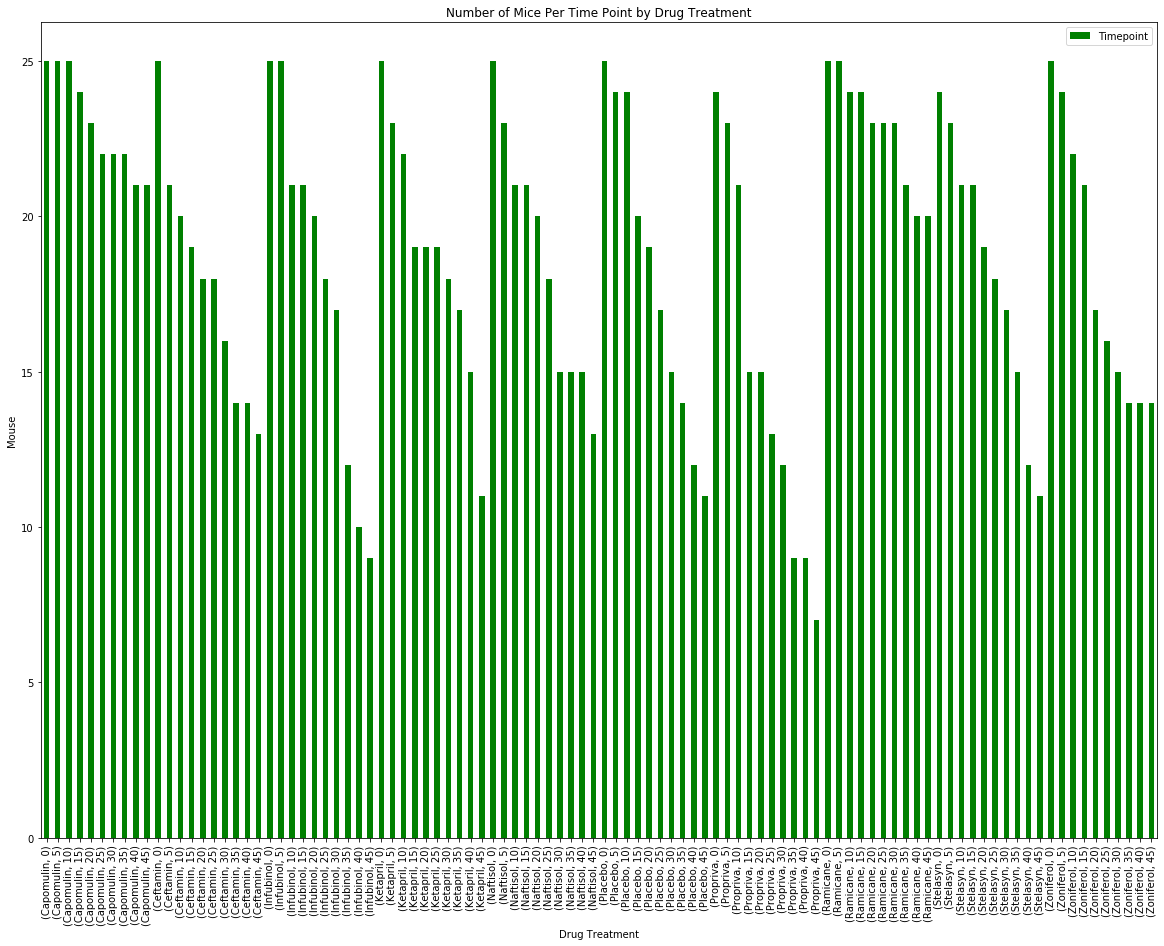

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#pd.DataFrame(clean_mouse_data.groupby(["Mouse ID", "Timepoint"]).count()["Tumor Volume (mm3)"])
time = clean_mouse_data.groupby(["Drug Regimen", "Timepoint"])
# treatment = clean_mouse_data.groupby(["Drug Regimen"])
# treatment = clean_mouse_data.groupby(["Timepoint"]).mean()
mice_per_timepoint = pd.DataFrame(time["Timepoint"].count())
# mice_per_timepoint = pd.DataFrame(time["Drug Regimen","Timepoint"])
# mice_per_treatment = pd.DataFrame(treatment["Timepoint"])
# mice_per_timepoint.info()

# panda_chart = mice_per_timepoint.plot.bar()
panda_chart = mice_per_timepoint.plot(kind="bar", figsize=(20,15), title="Number of Mice Per Time Point by Drug Treatment", color="green")

panda_chart.set_xlabel("Drug Treatment")
panda_chart.set_ylabel("Mouse")
#plt.tight_layout()
plt.show()


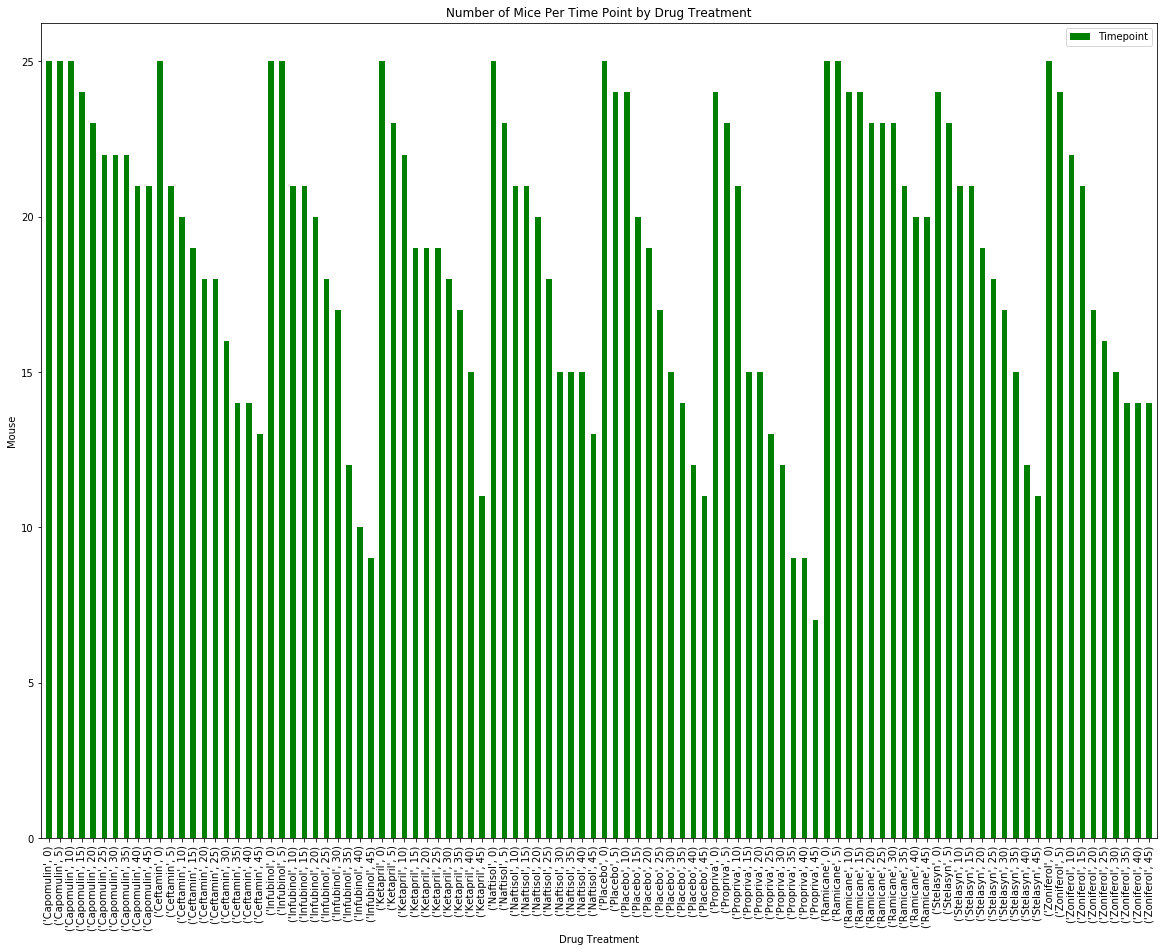

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(mice_per_timepoint))
ticks = [x for x in x_axis]
plt.figure(figsize=(20,15))
plt.bar(x_axis, mice_per_timepoint["Timepoint"], color="green", align="center", width=.5)
plt.xticks(ticks, list(mice_per_timepoint.index), rotation="vertical")

# set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(mice_per_timepoint["Timepoint"])*1.05)

# set labels and title
plt.xlabel("Drug Treatment")
plt.ylabel("Mouse")
column_name = ["Timepoint"]
plt.legend(column_name,loc="best")
plt.title("Number of Mice Per Time Point by Drug Treatment")

# show chart
plt.show()


## Pie Plots

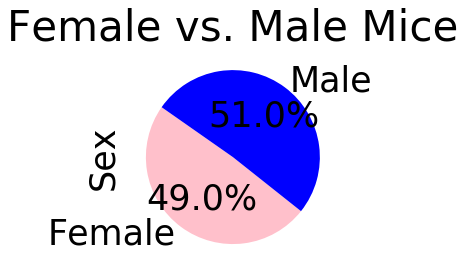

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Gather the gender data
mouse_sex = clean_mouse_data.groupby("Sex")
mouse_sex_df = pd.DataFrame(mouse_sex["Sex"].count())


# create the pandas pie plot
panda_chart = mouse_sex_df.plot(kind="pie",y="Sex",title="Female vs. Male Mice",legend=None,startangle=145,fontsize=35,
                                autopct='%1.1f%%',colors=["pink","blue"])



/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


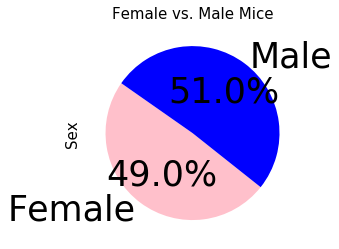

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# plt.pie(mouse_sex_df,labels=mouse_sex_df.index.values,colors=["pink","blue"],
#         autopct="%1.1f%%",startangle=125)
plt.pie(mouse_sex_df,labels=mouse_sex_df.index.values,colors=["pink","blue"],
        autopct="%1.1f%%",startangle=145)
plt.rcParams["font.size"] = 35
plt.title("Female vs. Male Mice", fontsize=15)
plt.ylabel("Sex", fontsize=15)
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Create a dataframe of the most promising treatments
promising_drug_data = clean_mouse_data.loc[(clean_mouse_data["Drug Regimen"]=="Capomulin") | (clean_mouse_data["Drug Regimen"]=="Ramicane") | (clean_mouse_data["Drug Regimen"]=="Ceftamin") | (clean_mouse_data["Drug Regimen"]=="Infubinol"), :] 
promising_drug_data = promising_drug_data.sort_values(["Timepoint"], ascending=False)
promising_drug_final_tumor = promising_drug_data.drop_duplicates(subset="Mouse ID", keep="first")
promising_drug = promising_drug_final_tumor[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

promising_drug.head(25)


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098
463,Infubinol,a203,45,67.973419
473,Infubinol,a251,45,65.525743
134,Capomulin,r554,45,32.377357
493,Ceftamin,a275,45,62.999356
124,Capomulin,y793,45,31.896238


In [79]:
# Calculate the IQR and quantitatively to determine if there are any potential outliers. 
# list of treatment drugs 
drugs = ["Capomulin","Ramicane","Ceftamin","Infubinol"]

for treatment in drugs:
# If treatment == promising_drug["Drug Regimen"]:
    quartiles = promising_drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    print(f"{treatment} lower quartile is: {lowerq}")
    print(f"{treatment} upper quartile is: {upperq}")
    print(f"{treatment} Interquartile range is: {iqr}")
    print(f"{treatment} median is: {quartiles[0.5]}")
    print(f"{treatment} values below {lower_bound} could be outliers.")
    print(f"{treatment} values above {upper_bound} could be outliers.")
    print()

Capomulin lower quartile is: 37.19
Capomulin upper quartile is: 59.93
Capomulin Interquartile range is: 22.74
Capomulin median is: 45.0
Capomulin values below 3.08 could be outliers.
Capomulin values above 94.04 could be outliers.

Ramicane lower quartile is: 37.19
Ramicane upper quartile is: 59.93
Ramicane Interquartile range is: 22.74
Ramicane median is: 45.0
Ramicane values below 3.08 could be outliers.
Ramicane values above 94.04 could be outliers.

Ceftamin lower quartile is: 37.19
Ceftamin upper quartile is: 59.93
Ceftamin Interquartile range is: 22.74
Ceftamin median is: 45.0
Ceftamin values below 3.08 could be outliers.
Ceftamin values above 94.04 could be outliers.

Infubinol lower quartile is: 37.19
Infubinol upper quartile is: 59.93
Infubinol Interquartile range is: 22.74
Infubinol median is: 45.0
Infubinol values below 3.08 could be outliers.
Infubinol values above 94.04 could be outliers.



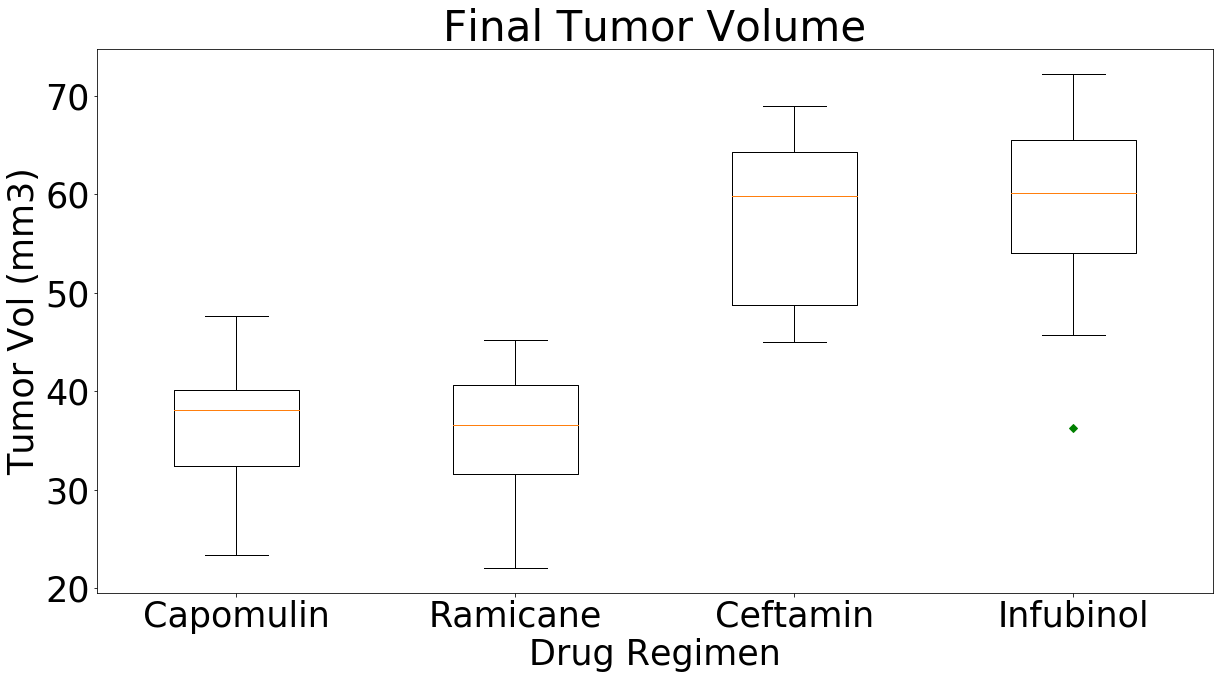

In [94]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_volume = promising_drug.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumors = pd.DataFrame(final_volume)
tumors = tumors.reindex(drugs)
tumor_volumes = [x for x in tumors["Tumor Volume (mm3)"]]
fig1, ax = plt.subplots(figsize=(20,10))
# plt.subplot(tumor_volumes, labels=drugs)
# plt.ylim(10,80)
ax.set_title("Final Tumor Volume")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Vol (mm3)")
ax.boxplot(tumor_volumes,notch=0,sym='gD')
plt.xticks([1,2,3,4],drugs)

plt.show()

## Line and Scatter Plots

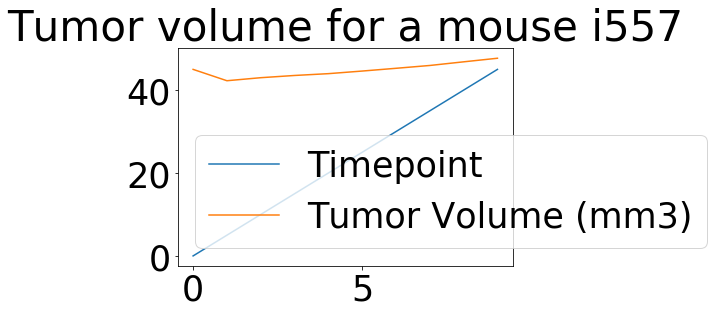

In [175]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# get Capomulin data for mouse id i557
capomulin_i557_data = clean_mouse_data.loc[(clean_mouse_data["Mouse ID"] == "i557") & (clean_mouse_data["Drug Regimen"]=="Capomulin")]
capomulin_i557_data

capomulin_i557_timepoints = capomulin_i557_data[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
capomulin_i557_timepoints

capomulin_i557_df = capomulin_i557_timepoints.reset_index()
capomulin_i557_df

results = capomulin_i557_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
results

#create plot values
line_plot = results.plot.line()

plt.title("Tumor volume for a mouse i557")
plt.legend(loc="lower left")
# plt.xlim(0,50)
# plt.ylim(0,0)
plt.show()

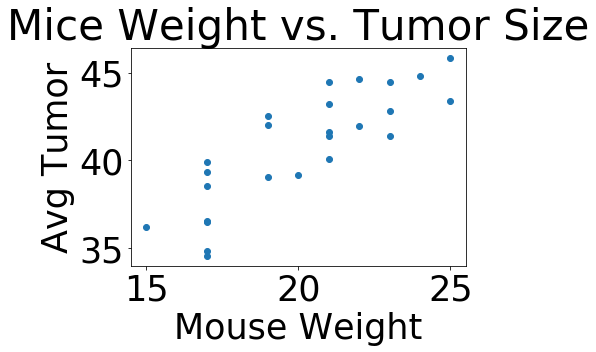

In [188]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# get Capomulin data 
capomulin_data = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]=="Capomulin"]
capomulin_data

weight = capomulin_data.groupby(capomulin_data["Mouse ID"])["Weight (g)"].mean()
avg_tumor_volumn = capomulin_data.groupby(capomulin_data["Mouse ID"])["Tumor Volume (mm3)"].mean()

#create plot values
plt.scatter(weight,avg_tumor_volumn)
plt.title("Mice Weight vs. Tumor Size")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


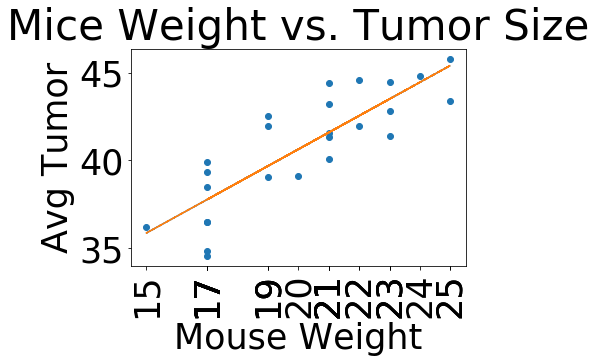

In [195]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight,avg_tumor_volumn)
print(f"The correlation between both factors is {round(correlation[0],2)}")


# Perform a linear regression on weight versus average tumor volume
slope, vint, r, p, std_err = st.linregress(weight, avg_tumoor_volumn)

# Create equation of line to calculate predicted average tumor volume
fit = slope * weight + vint

# Plot the linear model on top of scatter plot 
plt.scatter(weight,avg_tumoor_volumn)
plt.plot(weight,fit,"--")
plt.title("Mice Weight vs. Tumor Size")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg Tumor")
plt.plot(weight,fit,"--")
plt.xticks(weight, rotation=90)
plt.show()
